In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%pip install uncertainties
from uncertainties import ufloat
from uncertainties.umath import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.6 MB/s eta 0:00:00


In [ ]:
configs = {
    "0.1 545-555.txt": {
        "name": "Current vs Voltage for 545-555nm Filter and 0.1 ND Filter",
        "cutoff": 0.5,
        "cutoff_lower": -1
    },
    "0.3 545-555.txt": {
        "name": "Current vs Voltage for 545-555nm Filter and 0.3 ND Filter",
        "cutoff": 0.5,
        "cutoff_lower": -10
    },
    "0.5 545-555 broad.txt": {
        "name": "Current vs Voltage for 545-555nm Filter and 0.5 ND Filter",
        "cutoff": 1,
        "cutoff_lower": -1
    },
    "0.9 545-555 broad.txt": {
        "name": "Current vs Voltage for 545-555nm Filter and 0.9 ND Filter",
        "cutoff": 0.5,
        "cutoff_lower": -10
    },
    "545-555.txt": {
        "name": "Current vs Voltage for 545-555nm Filter",
        "cutoff": 0.5,
        "cutoff_lower": -10
    },
    "0.1 blue 431-440.txt": {
        "name": "Current vs Voltage for 431-440nm Filter and 0.1 ND Filter",
        "cutoff": 0.5,
        "cutoff_lower": -10
    },
    "0.3 blue 431-440.txt": {
        "name": "Current vs Voltage for 431-440nm Filter and 0.3 ND Filter",
        "cutoff": 0.5,
        "cutoff_lower": -10
    },
    "0.5 blue 431-440.txt": {
        "name": "Current vs Voltage for 431-440nm Filter and 0.5 ND Filter",
        "cutoff": 0.5,
        "cutoff_lower": -10
    },
    "0.9 blue 431-440.txt": {
        "name": "Current vs Voltage for 431-440nm Filter and 0.9 ND Filter",
        "cutoff": 0.5,
        "cutoff_lower": -10
    },
    "blue 431-440.txt": {
        "name": "Current vs Voltage for 431-440nm Filter",
        "cutoff": 0.5,
        "cutoff_lower": -10
    },
    "0.1 yellow broad.txt": {
        "name": "Current vs Voltage for yellow Filter and 0.1 ND Filter",
        "cutoff": 0.5,
        "cutoff_lower": -10
    },
    "0.3 yellow broad.txt": {
        "name": "Current vs Voltage for yellow Filter and 0.3 ND Filter",
        "cutoff": 0.5,
        "cutoff_lower": -10
    },
    "0.5 yellow broad.txt": {
        "name": "Current vs Voltage for yellow Filter and 0.5 ND Filter",
        "cutoff": 0.5,
        "cutoff_lower": -10
    },
    "0.9 yellow long.txt": {
        "name": "Current vs Voltage for yellow Filter and 0.9 ND Filter",
        "cutoff": 0.5,
        "cutoff_lower": -10
    },
    "yellow_.txt": {
        "name": "Current vs Voltage for yellow Filter",
        "cutoff": 0.5,
        "cutoff_lower": -10
    },
    "249-259.txt": {
        "name": "Current vs Voltage for 249-259nm Filter",
        "cutoff": 0.5,
        "cutoff_lower": -10
    },
    "365-375.txt": {
        "name": "Current vs Voltage for 365-375nm Filter",
        "cutoff": 0.5,
        "cutoff_lower": -10
    },
    "nofilter.txt": {
        "name": "Current vs Voltage for no Filters",
        "cutoff": 0.5,
        "cutoff_lower": -10
    },
}

emission_lines = {
    184.9499: "nofilter",
    253.6517: "249-259",
    365.0153: "365-375",
    435.8328: "blue 431-440",
    546.0735: "545-555",
    576.959: "yellow"
}

In [ ]:
wavelength_filters = ["249-259.txt", "365-375.txt", "nofilter.txt", "blue 431-440.txt", "545-555.txt", "yellow_.txt"]

In [ ]:
def read_file(file_name):
    df = pd.read_csv(file_name, sep="\t", header=0)
    df = df.iloc[:, :2]
    # rename columns
    df.columns = ["volts", "nanoamps"]
    df["nanoamps"] *= -1
    return df

def two_slopes(x, m1, m2, c, d):
    m1 = np.abs(m1)
    m2 = np.abs(m2)
    b1 = -c * m1
    b2 = -c * m2
    y = np.empty_like(x)
    y[x < c] = m1 * x[x < c] + b1 + d
    y[x >= c] = m2 * x[x >= c] + b2 + d
    return y

def fit_data(df, cutoff, cutoff_lower=-10):
    indices = (df["volts"] < cutoff) & (df["volts"] > cutoff_lower)
    popt, pcov = curve_fit(two_slopes, df["volts"][indices], df["nanoamps"][indices], p0=[0, 1, 0, 0])
    return popt, pcov

def plot_fit(filename, cutoff, cutoff_lower=-10):
    df = read_file(filename)
    popt, pcov = fit_data(df, cutoff)
    indices = (df["volts"] < cutoff) & (df["volts"] > cutoff_lower)
    plt.plot(df["volts"], df["nanoamps"], "o", label="data")
    plt.plot(df["volts"][indices], two_slopes(df["volts"][indices], *popt), "r-", label="fit")
    plt.legend()

def plot_from_config(file_name, cfg, plot=True):
    c = cfg[file_name]

    if plot:
      plot_fit(file_name, c["cutoff"], c["cutoff_lower"])
      plt.title(c["name"])
      plt.xlabel("Voltage (V)")
      plt.ylabel("Current (nA)")
      # plt.show()

    return fit_data(read_file(file_name), c["cutoff"], c["cutoff_lower"])

In [ ]:
emission_lines.keys()

dict_keys([184.9499, 253.6517, 365.0153, 435.8328, 546.0735, 576.959])

In [ ]:
# accepted = [184.9499, 253.6517, 546.0735]
# accepted = list(emission_lines.keys())[2:]
accepted = list(emission_lines.keys())

data = np.zeros((len(accepted), 2))
for i,wavelength in enumerate(accepted):
    for filename in wavelength_filters:
      if emission_lines[wavelength] in filename:
        f = filename
        break
    a = plot_from_config(f, configs, plot=False)
    print(wavelength, a[0][2], np.sqrt(a[1][2, 2]))
    data[i, 0] = 1/wavelength
    data[i, 1] = np.abs(a[0][2])
    # wavelength, stopping potential V, error in stopping potential

184.9499 -0.40624334779210497 0.013097055856245685
253.6517 -0.358343390492835 0.012018926957942763
365.0153 -0.5047872496145361 0.014170967438302848
435.8328 -0.42844803384092994 0.008789001580629308
546.0735 -0.32101658145492085 0.011193573879543745
576.959 -0.3500045023036544 0.18710910534411695


Slope:  8.200660974400351e-09 2.291142575133905e-08
Intercept:  0.37027650163759485 0.07477251631986184


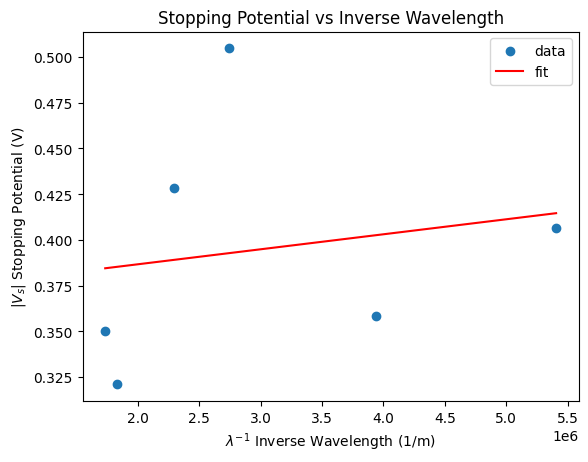

In [ ]:
data[:,0] = data[:,0] * 10**9
# plot data as a scatterplot
plt.scatter(data[:,0], data[:,1], label="data")
# linear fit to data
popt, pcov = curve_fit(lambda x, a, b: a*x + b, data[:,0], data[:,1])
# plot fit
plt.plot(data[:,0], popt[0]*data[:,0] + popt[1], 'r-', label="fit")
plt.xlabel("$\lambda^{-1}$ Inverse Wavelength (1/m)")
plt.ylabel("$|V_s|$ Stopping Potential (V)")
plt.title("Stopping Potential vs Inverse Wavelength")
plt.legend()
# print slope and intercept
print("Slope: ", popt[0], np.sqrt(pcov[0,0]))
print("Intercept: ", popt[1], np.sqrt(pcov[1,1]))
# V = Energy/e

In [ ]:
h = 6.6e-34
e = 1.6e-19
c = 2.998e8

slope = ufloat(popt[0], np.sqrt(pcov[0,0]))
print(slope/c)

(3+/-8)e-17


In [ ]:
h/e

4.125e-15

In [ ]:
(slope/c - h/e)/(h/e)
# error percentage 100 percent times off

-0.9933687824413041+/-0.018526634525108904

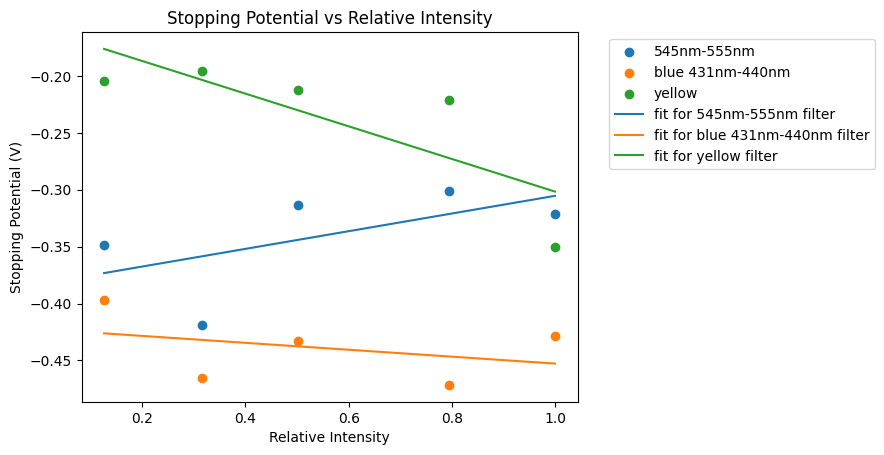

In [ ]:
nd1 = ["545-555.txt", "0.1 545-555.txt", "0.3 545-555.txt", "0.5 545-555 broad.txt", "0.9 545-555 broad.txt"]
nd2 = ["blue 431-440.txt", "0.1 blue 431-440.txt", "0.3 blue 431-440.txt", "0.5 blue 431-440.txt", "0.9 blue 431-440.txt"]
nd3 = ["yellow_.txt", "0.1 yellow broad.txt", "0.3 yellow broad.txt", "0.5 yellow broad.txt", "0.9 yellow long.txt"]
filter_names = ["545nm-555nm", "blue 431nm-440nm", "yellow"]

stoppings = np.zeros((len(nd1),4))
stoppings[:, 0] = 10**-np.array([0, 0.1, 0.3, 0.5, 0.9])
for i in range(len(nd1)):
    vs1 = plot_from_config(nd1[i], configs, plot=False)[0][2]
    vs2 = plot_from_config(nd2[i], configs, plot=False)[0][2]
    vs3 = plot_from_config(nd3[i], configs, plot=False)[0][2]
    stoppings[i, 1] = vs1
    stoppings[i, 2] = vs2
    stoppings[i, 3] = vs3

# make scatterplot for intensity vs vs1
plt.scatter(stoppings[:,0], stoppings[:,1], label=filter_names[0])
plt.scatter(stoppings[:,0], stoppings[:,2], label=filter_names[1])
plt.scatter(stoppings[:,0], stoppings[:,3], label=filter_names[2])
plt.xlabel("Relative Intensity")
plt.ylabel("Stopping Potential (V)")
plt.title("Stopping Potential vs Relative Intensity")

# lines of best fits for each column
slopes = []
for i in range(1,4):
    popt, pcov = curve_fit(lambda x, a, b: a*x + b, stoppings[:,0], stoppings[:,i])
    plt.plot(stoppings[:,0], popt[0]*stoppings[:,0] + popt[1], label="fit for " + filter_names[i-1] + " filter")
    # append slope \pm error to slopes
    slopes.append(ufloat(popt[0], np.sqrt(pcov[0,0])))

# show legend and place it outside the box
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [ ]:
np.mean(slopes)

-0.03205082086030766+/-0.033594678323240416

Text(0, 0.5, 'Current (nA)')

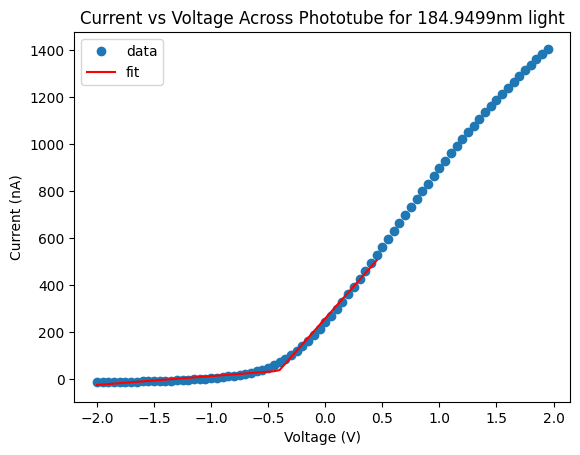

In [ ]:
plot_from_config("nofilter.txt", configs, plot=True)
plt.title("Current vs Voltage Across Phototube for 184.9499nm light")
plt.xlabel("Voltage (V)")
plt.ylabel("Current (nA)")